In [67]:
import numpy as np
import os
import sys
from gensim.models import KeyedVectors
from sklearn.metrics import RocCurveDisplay, classification_report
sys.path.append(os.path.join(os.path.dirname(os.path.abspath('')), 'scripts'))
from past_present_train_test_split import prepare_training_data
from CitationRateEncoder import CitationRateEncoder

In [68]:
np.random.seed(10)

In [69]:
G, df, (train, test) = prepare_training_data()
df = df.drop(columns=['Date', 'Title', 'Authors', 'Abstract'])
df.head()

Papers after date found by split : 20206


,Paper_ID,target_citation_rate
0,9511170,0.0
1,9211024,0.0
2,9806180,9.0
5,9503176,3.0
6,9611143,0.0


In [70]:
embs_path = os.path.join(os.pardir, 'n2c_embs')
node_embeddings = KeyedVectors.load_word2vec_format(embs_path)

In [71]:
df['embeddings'] = df['Paper_ID'].apply(lambda x: node_embeddings[str(x)])
df.head()

,Paper_ID,target_citation_rate,embeddings
0,9511170,0.0,"[0.2766353, 0.29462746, -0.09656201, -0.050717..."
1,9211024,0.0,"[0.1981441, 0.20687786, 0.007860992, -0.068715..."
2,9806180,9.0,"[0.21878144, 0.4326537, -0.41083947, -0.028274..."
5,9503176,3.0,"[0.26588473, 0.080661766, -0.008371197, -0.081..."
6,9611143,0.0,"[0.4128731, 0.13393031, 0.13527784, -0.1239899..."


In [ ]:
encoder = CitationRateEncoder(2)
encoder.fit(G)

<Axes: >

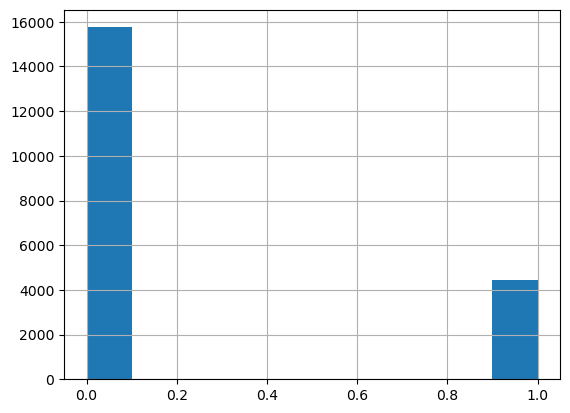

In [73]:
df['target'] = encoder.transform(df['target_citation_rate'])
df['target'].hist()

In [74]:
X_train = np.array(df[df['Paper_ID'].isin(train)]['embeddings'])
X_train = np.array([np.array(x) for x in X_train])
y_train = np.array(df[df['Paper_ID'].isin(train)]['target'])

X_test = np.array(df[df['Paper_ID'].isin(test)]['embeddings'])
X_test = np.array([np.array(x) for x in X_test])
y_test = np.array(df[df['Paper_ID'].isin(test)]['target'])

In [75]:
from sklearn.linear_model import LogisticRegression

edge_classifier = LogisticRegression(random_state=10)
edge_classifier.fit(X_train, y_train)

LogisticRegression(random_state=10)

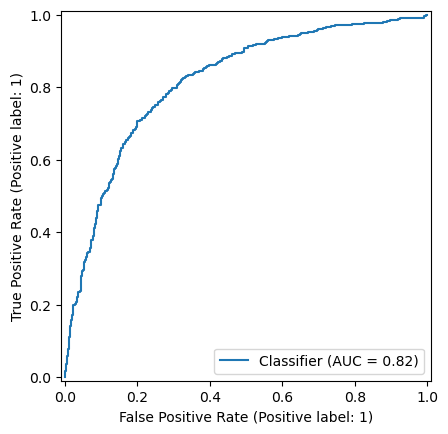

In [76]:
val_preds = edge_classifier.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_predictions(y_test, val_preds)

In [77]:
print(classification_report(y_test, (val_preds >= 0.5)))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1568
           1       0.64      0.27      0.38       453

    accuracy                           0.80      2021
   macro avg       0.73      0.61      0.63      2021
weighted avg       0.78      0.80      0.77      2021

